In [65]:
!pip install rarfile


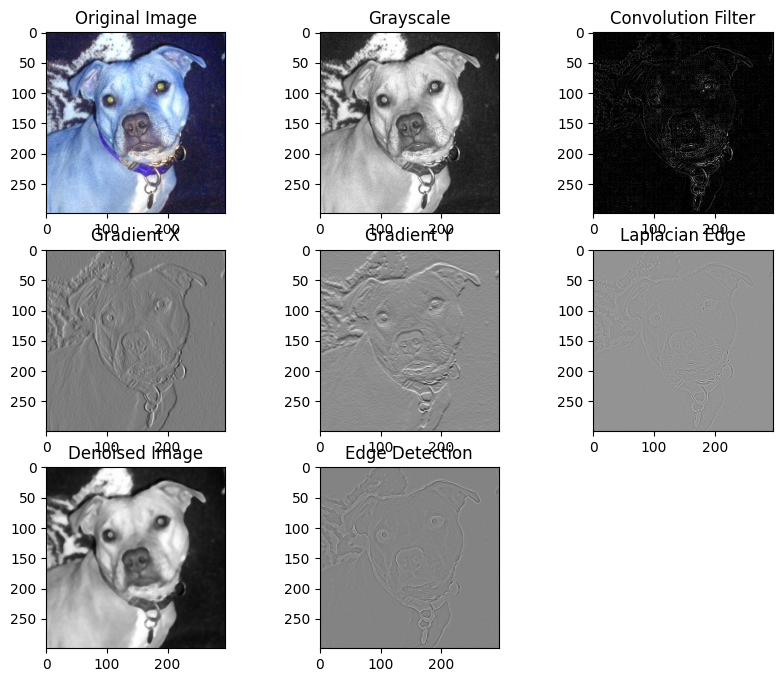

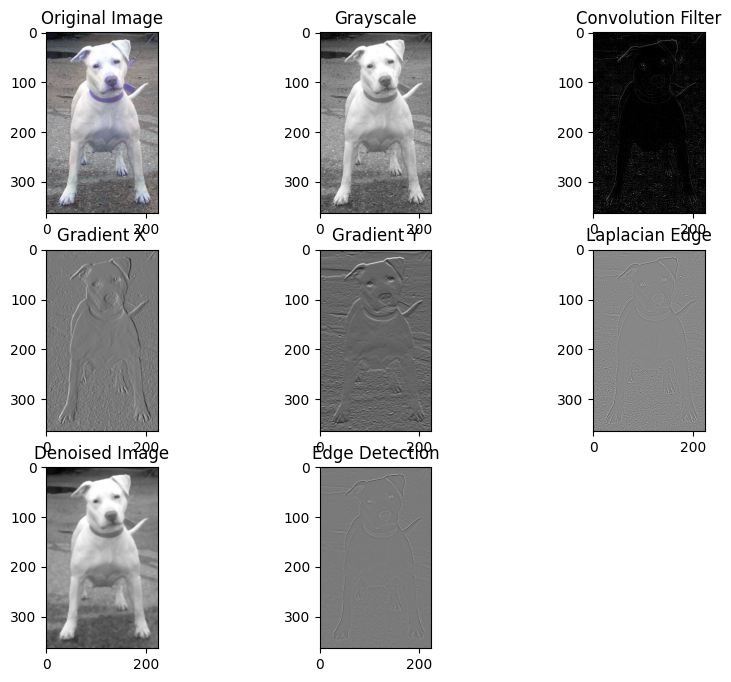

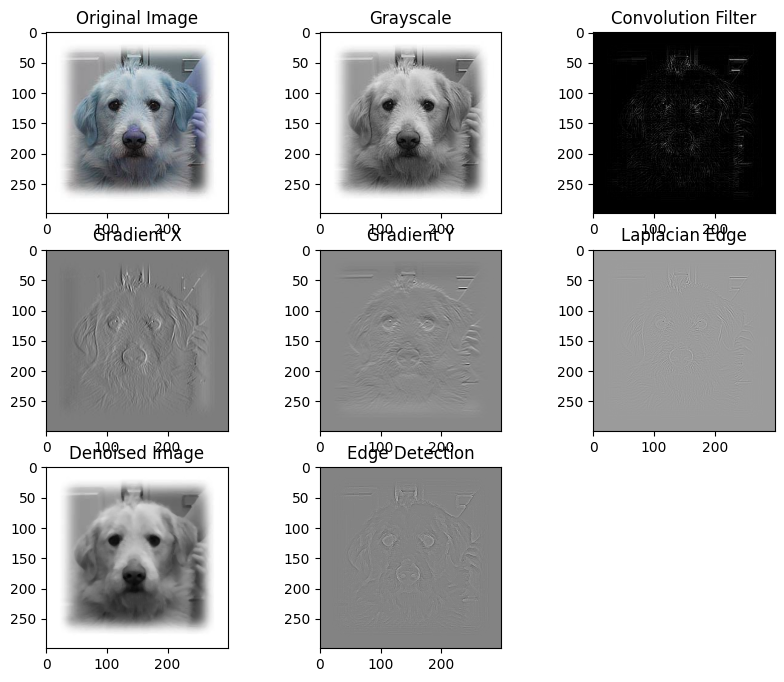

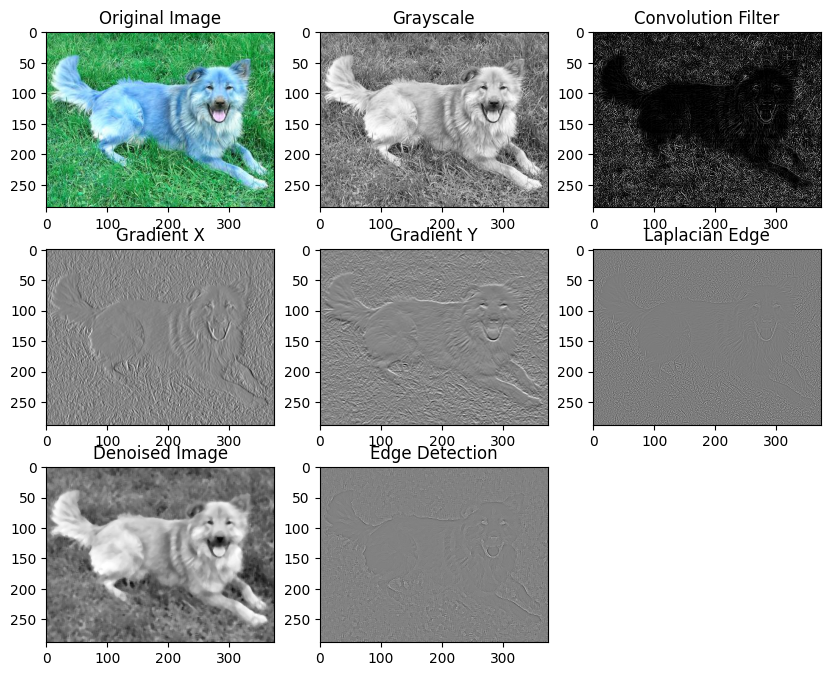

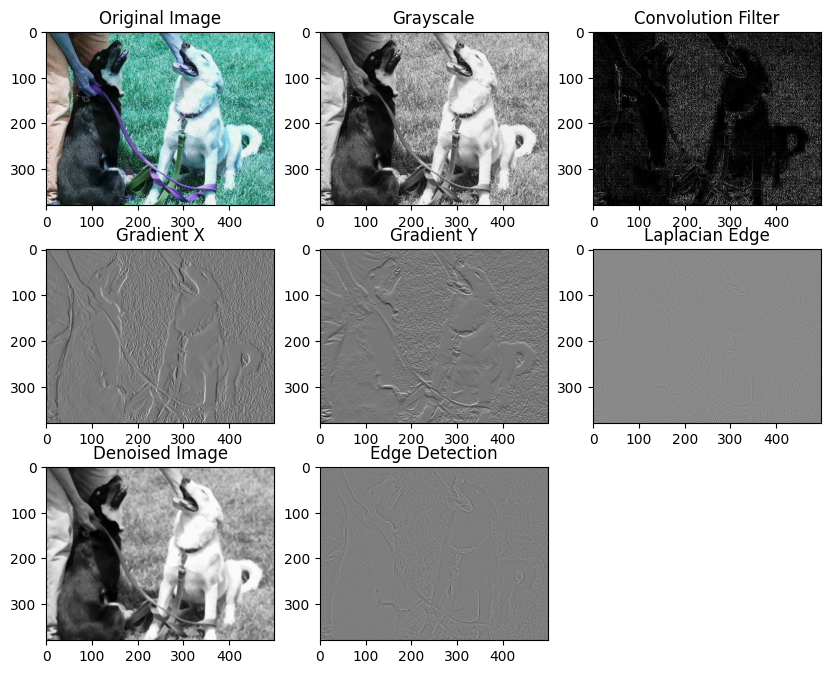

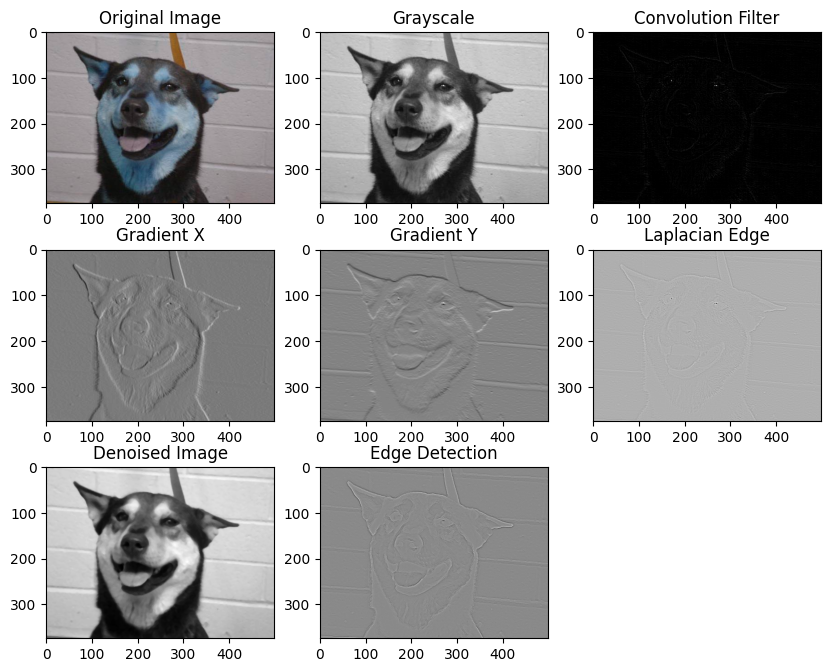

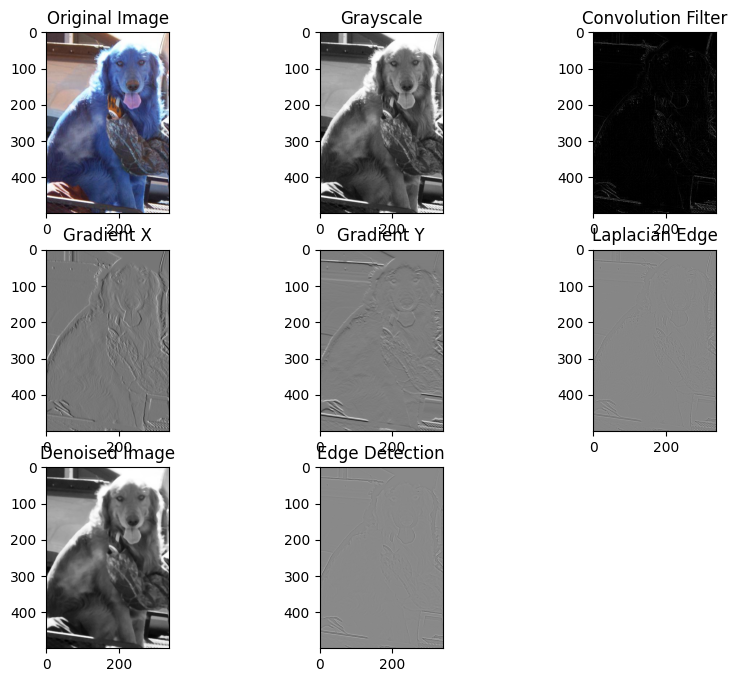

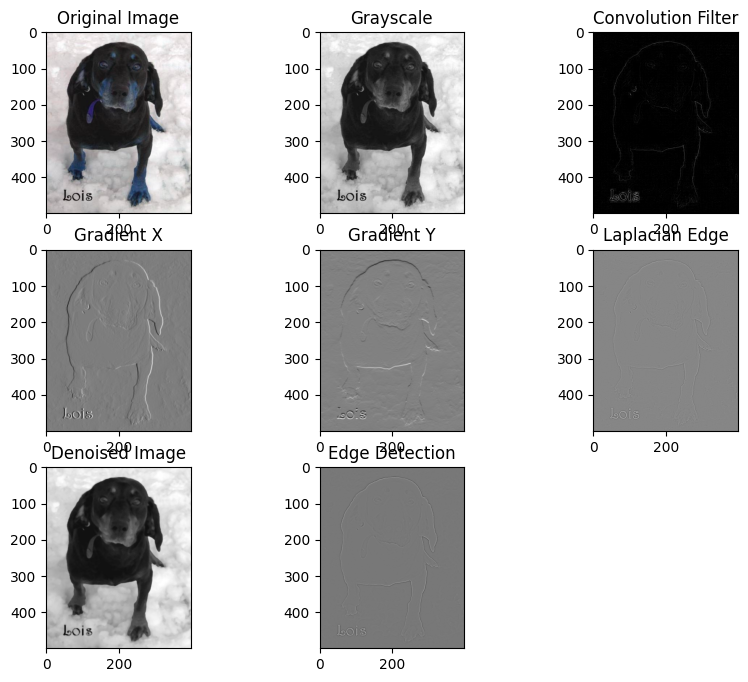

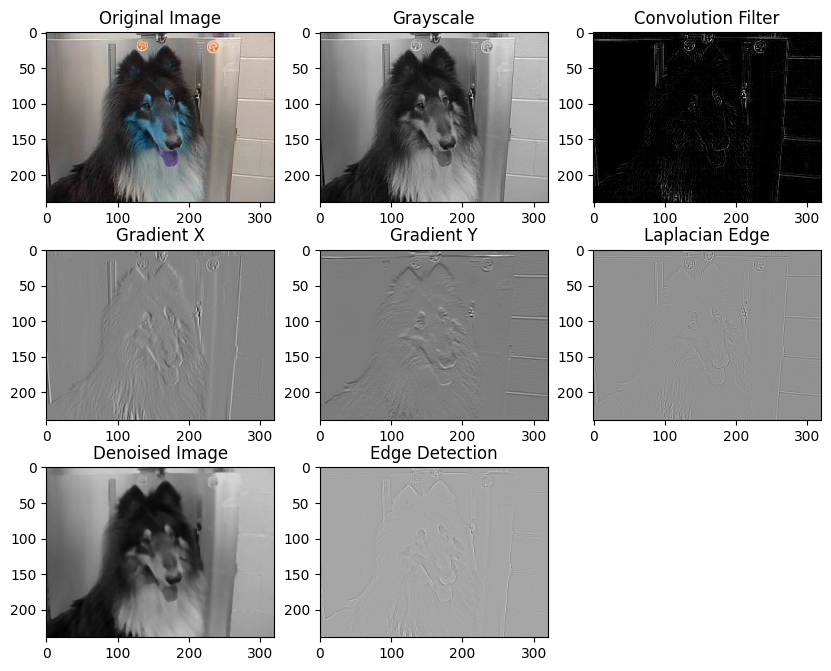

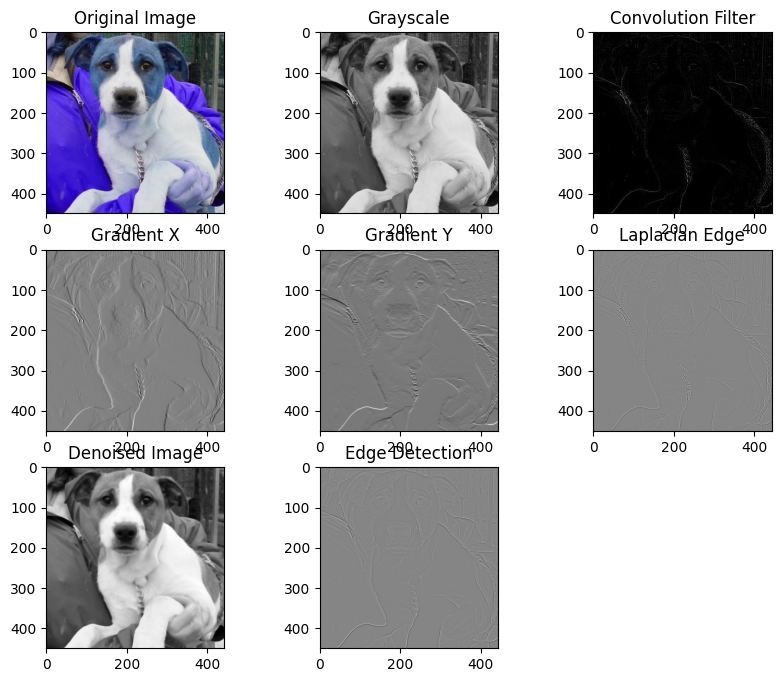

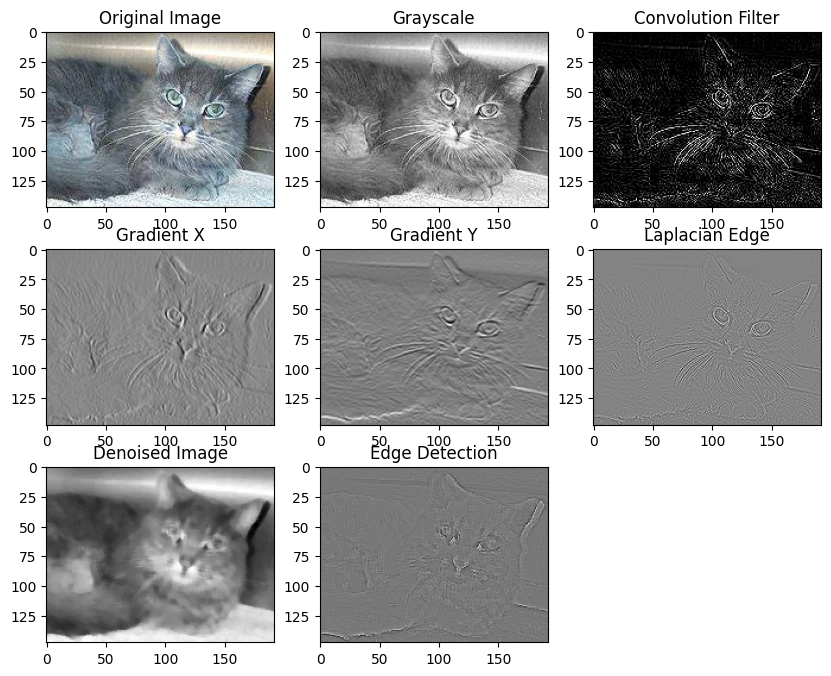

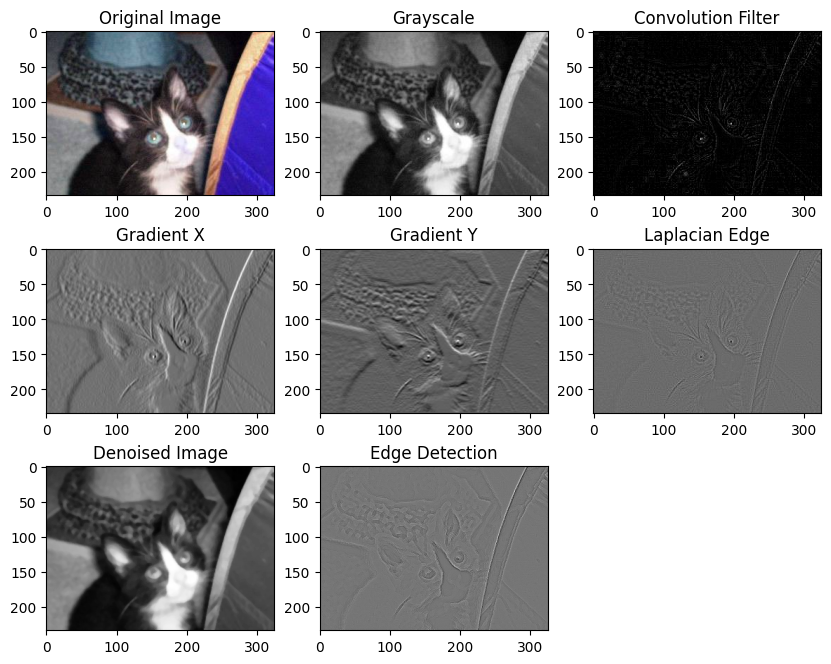

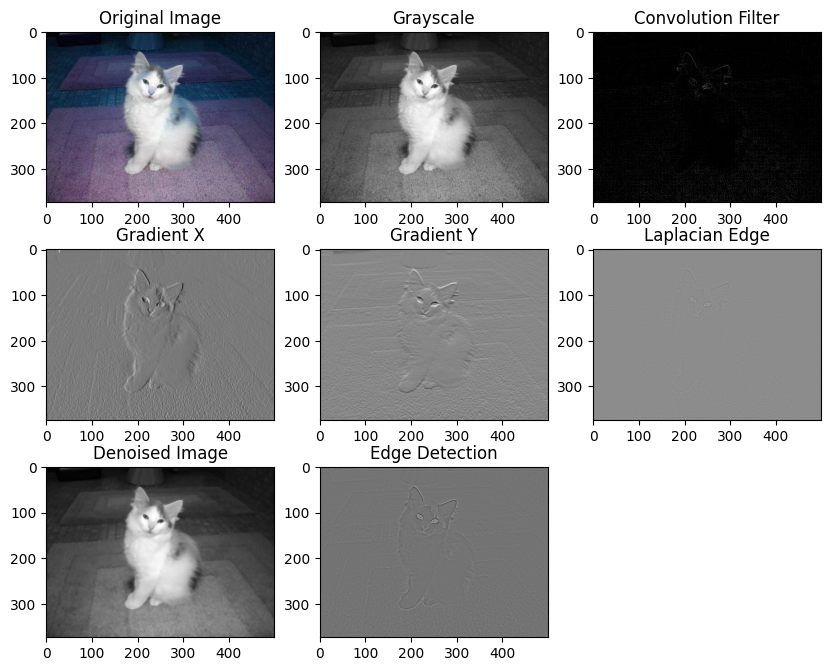

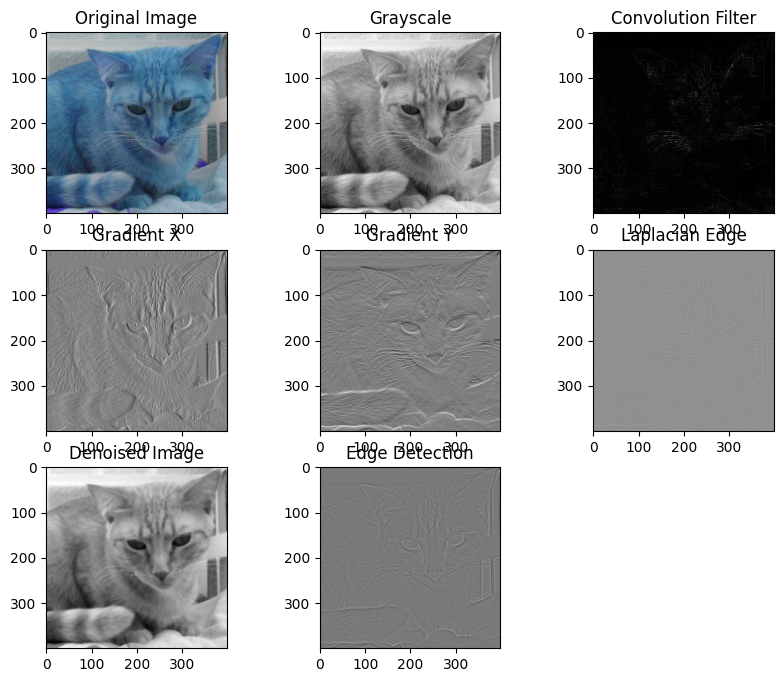

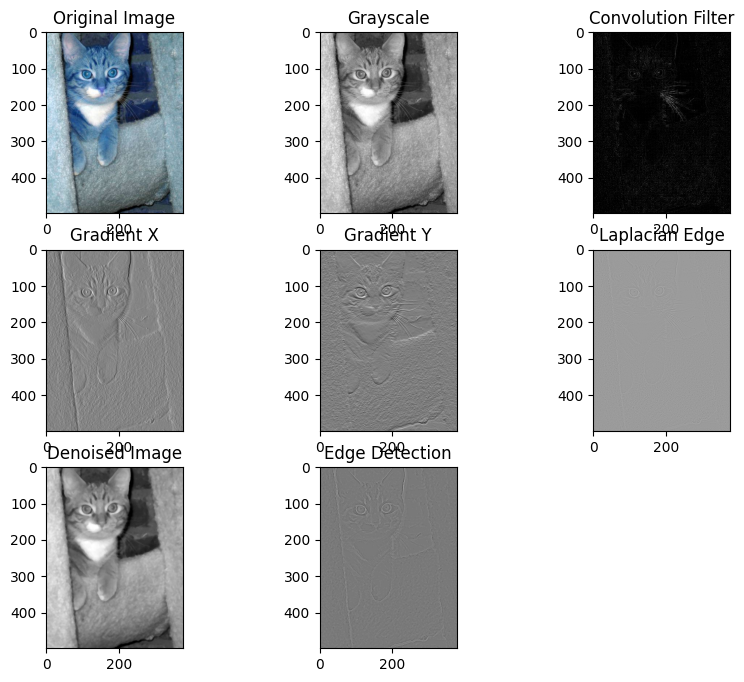

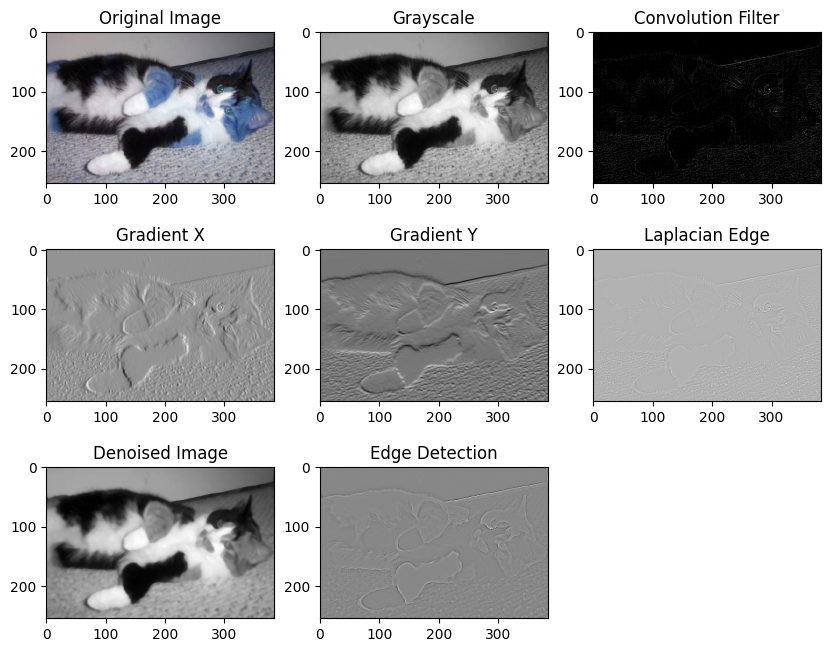

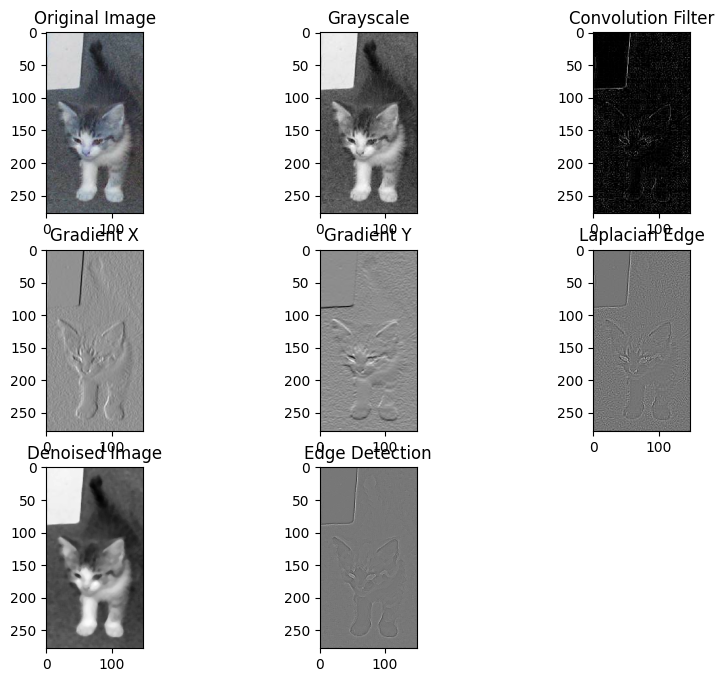

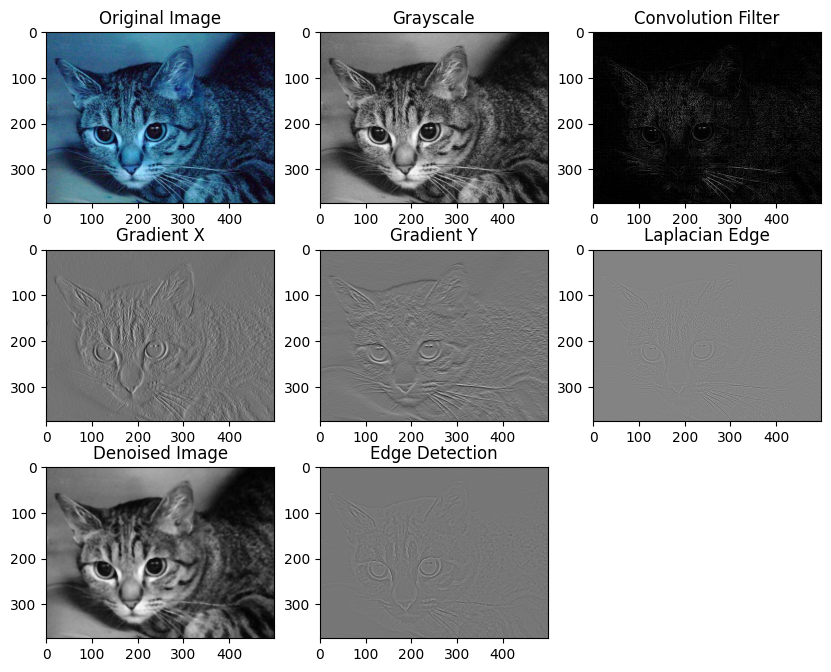

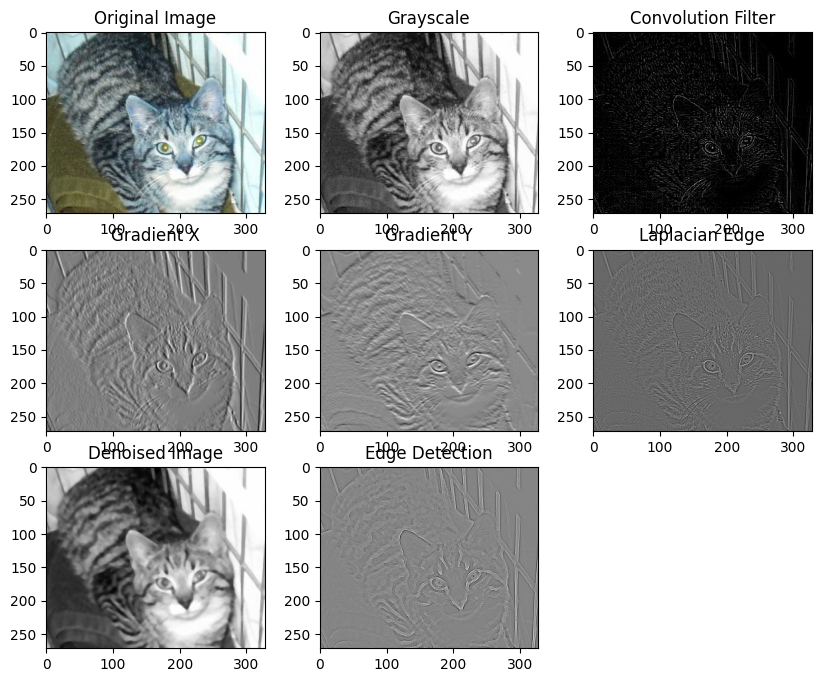

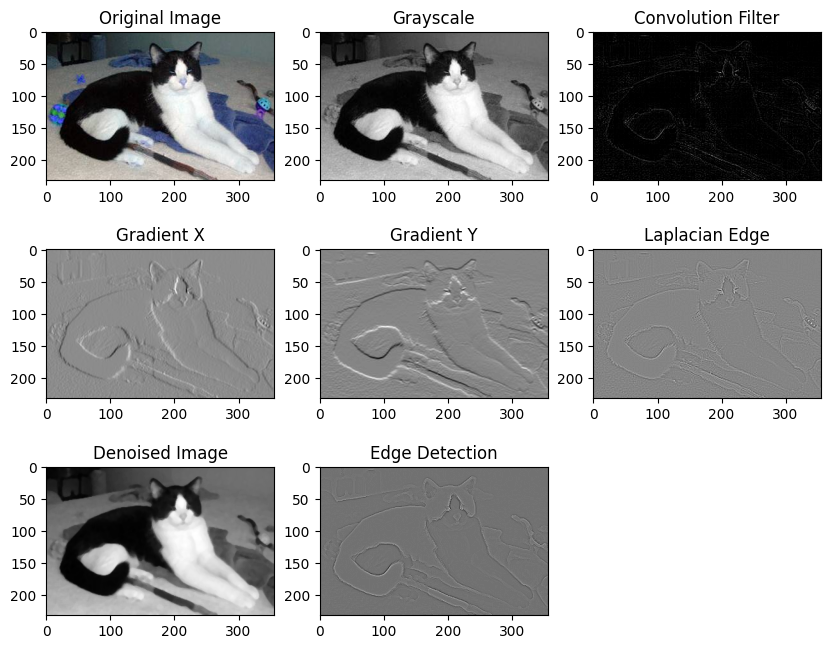

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Convert RGB images to grayscale
def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

# 2. Design a 3x3 convolution filter
def apply_convolution(image, kernel):
    convolved_image = cv2.filter2D(image, -1, kernel)
    return convolved_image

# 3. Design 1st and 2nd Order derivative filters
def apply_derivative_filters(image):
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return gradient_x, gradient_y, laplacian

# 4. Identify the type of noise
def detect_noise_type(image):
    is_gaussian_noise = np.any(image < 0) or np.any(image > 255)
    is_salt_and_pepper_noise = np.any((image != 0) & (image != 255))
    if is_gaussian_noise:
        return "Gaussian Noise"
    elif is_salt_and_pepper_noise:
        return "Salt and Pepper Noise"
    else:
        return "No Noise"

# 5. Apply a noise removal filter (e.g., median filter)
def remove_noise(image, noise_type):
    if noise_type == "Salt and Pepper Noise":
        denoised_image = cv2.medianBlur(image, 5)
    elif noise_type == "Gaussian Noise":
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
    else:
        denoised_image = image
    return denoised_image

# 6. Implement Laplacian edge detection
def edge_detection(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return laplacian

# Process a list of image filenames
image_filenames = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg',
                   '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg']

# Iterate through the images and apply processing
for filename in image_filenames:
    # Load the image
    image_path = '/content/' + filename  # Update the path to your images
    original_image = cv2.imread(image_path)

    # 1. Convert to grayscale
    gray_image = convert_to_grayscale(original_image)

    # 2. Define a 3x3 convolution kernel (you can modify this kernel)
    convolution_kernel = np.array([[0, -1, 0],
                                   [-1, 4, -1],
                                   [0, -1, 0]], dtype=np.float32)

    # Apply convolution filter
    convolved_image = apply_convolution(gray_image, convolution_kernel)

    # 3. Apply derivative filters and Laplacian edge detection
    gradient_x, gradient_y, laplacian_edge = apply_derivative_filters(gray_image)

    # 4. Identify noise type
    noise_type = detect_noise_type(gray_image)

    # 5. Remove noise
    denoised_image = remove_noise(gray_image, noise_type)

    # 6. Edge Detection
    edge_image = edge_detection(denoised_image)

    # Display the results using matplotlib
    plt.figure(figsize=(10, 8))

    plt.subplot(331), plt.imshow(original_image), plt.title('Original Image')
    plt.subplot(332), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale')
    plt.subplot(333), plt.imshow(convolved_image, cmap='gray'), plt.title('Convolution Filter')
    plt.subplot(334), plt.imshow(gradient_x, cmap='gray'), plt.title('Gradient X')
    plt.subplot(335), plt.imshow(gradient_y, cmap='gray'), plt.title('Gradient Y')
    plt.subplot(336), plt.imshow(laplacian_edge, cmap='gray'), plt.title('Laplacian Edge')
    plt.subplot(337), plt.imshow(denoised_image, cmap='gray'), plt.title('Denoised Image')
    plt.subplot(338), plt.imshow(edge_image, cmap='gray'), plt.title('Edge Detection')

    plt.show()


# **Task 1**

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/Labelled  Tweets.csv')

# Split the data into features (X) and labels (y)
X = data['Class']
y = data['Tweets']

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Verify the data structure
print(data.head())


   Class                                             Tweets
0      1  !!! RT @mayasolovely: As a woman you shouldn't...
1      0  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2      0  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3      0  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4      0  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# **Task 2**

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [89]:

# Create a BOW vectorizer
bow_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_bow = bow_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_bow = bow_vectorizer.transform(X_test)



# **Task 3**

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)



# **Task 4**

In [91]:
import nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [92]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download the missing data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')  # Add this line to download the missing tokenizer data

# Tokenization
X_train = [nltk.word_tokenize(text) for text in X_train]
X_test = [nltk.word_tokenize(text) for text in X_test]

# Lowercasing
X_train = [[token.lower() for token in tokens] for tokens in X_train]
X_test = [[token.lower() for token in tokens] for tokens in X_test]

# Stop word removal
stop_words = set(stopwords.words('english'))
X_train = [[token for token in tokens if token not in stop_words] for tokens in X_train]
X_test = [[token for token in tokens if token not in stop_words] for tokens in X_test]

# Stemming (Porter Stemmer)
stemmer = PorterStemmer()
X_train = [[stemmer.stem(token) for token in tokens] for tokens in X_train]
X_test = [[stemmer.stem(token) for token in tokens] for tokens in X_test]

# Lemmatization (WordNet Lemmatizer)
lemmatizer = WordNetLemmatizer()
X_train = [' '.join([lemmatizer.lemmatize(token) for token in tokens]) for tokens in X_train]
X_test = [' '.join([lemmatizer.lemmatize(token) for token in tokens]) for tokens in X_test]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Task 5**

In [93]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and bias for BOW
num_features = X_train_bow.shape[1]
weights_bow = np.zeros(num_features)
bias_bow = 0

# Learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Training the model for BOW
for _ in range(num_iterations):
    # Calculate predicted values
    predicted_bow = sigmoid(X_train_bow.dot(weights_bow) + bias_bow)

    # Calculate gradients
    num_samples = X_train_bow.shape[0]
    dw_bow = (1 / num_samples) * X_train_bow.T.dot(predicted_bow - y_train)
    db_bow = (1 / num_samples) * np.sum(predicted_bow - y_train)

    # Update weights and bias
    weights_bow -= learning_rate * dw_bow
    bias_bow -= learning_rate * db_bow

# Predict on the test set for BOW
predicted_test_bow = sigmoid(X_test_bow.dot(weights_bow) + bias_bow)
predicted_test_bow = np.round(predicted_test_bow)

# **Task 6**

In [94]:
from sklearn.linear_model import LogisticRegression

# Initialize and train a logistic regression model using the TF-IDF representation
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set for TF-IDF
predicted_test_tfidf = lr_tfidf.predict(X_test_tfidf)

# Calculate evaluation metrics for TF-IDF representation
accuracy_tfidf = accuracy_score(y_test, predicted_test_tfidf)
precision_tfidf = precision_score(y_test, predicted_test_tfidf)
recall_tfidf = recall_score(y_test, predicted_test_tfidf)
f1_tfidf = f1_score(y_test, predicted_test_tfidf)



# **Task 7**

In [95]:
# Print the metrics for BOW representation
print("BOW Representation:")
print(f"Accuracy: {accuracy_bow}")
print(f"Precision: {precision_bow}")
print(f"Recall: {recall_bow}")
print(f"F1-score: {f1_bow}")

# Print the metrics for TF-IDF representation
print("\nTF-IDF Representation:")
print(f"Accuracy: {accuracy_tfidf}")
print(f"Precision: {precision_tfidf}")
print(f"Recall: {recall_tfidf}")
print(f"F1-score: {f1_tfidf}")


BOW Representation:
Accuracy: 0.8315513415372201
Precision: 0.0
Recall: 0.0
F1-score: 0.0

TF-IDF Representation:
Accuracy: 0.9364535001008675
Precision: 0.8641456582633054
Recall: 0.7389221556886227
F1-score: 0.7966429954809555
